## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9630415	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9458419	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9260788	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9104753	total: 62ms	remaining: 15.4s
4:	learn: 0.8950799	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8787674	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8618740	total: 65ms	remaining: 9.22s
7:	learn: 0.8462257	total: 66.1ms	remaining: 8.2s
8:	learn: 0.8311771	total: 67.3ms	remaining: 7.41s
9:	learn: 0.8154223	total: 68.5ms	remaining: 6.78s
10:	learn: 0.8012123	total: 69.5ms	remaining: 6.25s
11:	learn: 0.7880189	total: 70.6ms	remaining: 5.81s
12:	learn: 0.7751341	total: 71.7ms	remaining: 5.45s
13:	learn: 0.7628356	total: 72.6ms	remaining: 5.12s
14:	learn: 0.7507681	total: 73.8ms	remaining: 4.85s
15:	learn: 0.7373355	total: 74.8ms	remaining: 4.6s
16:	learn: 0.7261037	total: 75.7ms	remaining: 4.38s
17:	learn: 0.7137969	total: 76.6ms	remaining: 4.18s
18:	learn: 0.7019623	total: 77.7ms	remaining: 4.01

52:	learn: 0.4528267	total: 109ms	remaining: 1.94s
53:	learn: 0.4494989	total: 110ms	remaining: 1.92s
54:	learn: 0.4454503	total: 110ms	remaining: 1.9s
55:	learn: 0.4417666	total: 111ms	remaining: 1.87s
56:	learn: 0.4376943	total: 112ms	remaining: 1.85s
57:	learn: 0.4334101	total: 114ms	remaining: 1.84s
58:	learn: 0.4299617	total: 114ms	remaining: 1.82s
59:	learn: 0.4258919	total: 115ms	remaining: 1.81s
60:	learn: 0.4219687	total: 116ms	remaining: 1.79s
61:	learn: 0.4175065	total: 117ms	remaining: 1.77s
62:	learn: 0.4129008	total: 118ms	remaining: 1.75s
63:	learn: 0.4096150	total: 119ms	remaining: 1.74s
64:	learn: 0.4062688	total: 120ms	remaining: 1.72s
65:	learn: 0.4025372	total: 120ms	remaining: 1.7s
66:	learn: 0.3991028	total: 121ms	remaining: 1.69s
67:	learn: 0.3959647	total: 122ms	remaining: 1.67s
68:	learn: 0.3926767	total: 123ms	remaining: 1.66s
69:	learn: 0.3900255	total: 124ms	remaining: 1.64s
70:	learn: 0.3869573	total: 125ms	remaining: 1.63s
71:	learn: 0.3846472	total: 126ms

131:	learn: 0.2759108	total: 176ms	remaining: 1.16s
132:	learn: 0.2749589	total: 178ms	remaining: 1.16s
133:	learn: 0.2740414	total: 178ms	remaining: 1.15s
134:	learn: 0.2730432	total: 179ms	remaining: 1.15s
135:	learn: 0.2719703	total: 180ms	remaining: 1.14s
136:	learn: 0.2712618	total: 181ms	remaining: 1.14s
137:	learn: 0.2702984	total: 182ms	remaining: 1.14s
138:	learn: 0.2694832	total: 183ms	remaining: 1.13s
139:	learn: 0.2687061	total: 183ms	remaining: 1.13s
140:	learn: 0.2680810	total: 184ms	remaining: 1.12s
141:	learn: 0.2669313	total: 185ms	remaining: 1.12s
142:	learn: 0.2656181	total: 186ms	remaining: 1.11s
143:	learn: 0.2643424	total: 187ms	remaining: 1.11s
144:	learn: 0.2633579	total: 187ms	remaining: 1.1s
145:	learn: 0.2623413	total: 188ms	remaining: 1.1s
146:	learn: 0.2612986	total: 189ms	remaining: 1.1s
147:	learn: 0.2601421	total: 190ms	remaining: 1.09s
148:	learn: 0.2593298	total: 192ms	remaining: 1.1s
149:	learn: 0.2588832	total: 193ms	remaining: 1.09s
150:	learn: 0.25

255:	learn: 0.1940440	total: 282ms	remaining: 821ms
256:	learn: 0.1935427	total: 283ms	remaining: 819ms
257:	learn: 0.1932771	total: 284ms	remaining: 818ms
258:	learn: 0.1928904	total: 285ms	remaining: 816ms
259:	learn: 0.1924741	total: 286ms	remaining: 814ms
260:	learn: 0.1917775	total: 287ms	remaining: 813ms
261:	learn: 0.1914557	total: 288ms	remaining: 811ms
262:	learn: 0.1910234	total: 289ms	remaining: 809ms
263:	learn: 0.1904776	total: 290ms	remaining: 808ms
264:	learn: 0.1901519	total: 291ms	remaining: 806ms
265:	learn: 0.1898191	total: 292ms	remaining: 806ms
266:	learn: 0.1893077	total: 293ms	remaining: 804ms
267:	learn: 0.1887494	total: 294ms	remaining: 803ms
268:	learn: 0.1882570	total: 295ms	remaining: 801ms
269:	learn: 0.1877866	total: 295ms	remaining: 799ms
270:	learn: 0.1872798	total: 296ms	remaining: 797ms
271:	learn: 0.1867896	total: 297ms	remaining: 796ms
272:	learn: 0.1863572	total: 298ms	remaining: 794ms
273:	learn: 0.1859074	total: 299ms	remaining: 792ms
274:	learn: 

334:	learn: 0.1653065	total: 350ms	remaining: 694ms
335:	learn: 0.1649100	total: 351ms	remaining: 693ms
336:	learn: 0.1645818	total: 351ms	remaining: 691ms
337:	learn: 0.1641987	total: 352ms	remaining: 690ms
338:	learn: 0.1636993	total: 353ms	remaining: 688ms
339:	learn: 0.1635998	total: 354ms	remaining: 687ms
340:	learn: 0.1634197	total: 355ms	remaining: 685ms
341:	learn: 0.1631280	total: 355ms	remaining: 684ms
342:	learn: 0.1627752	total: 356ms	remaining: 682ms
343:	learn: 0.1624374	total: 357ms	remaining: 681ms
344:	learn: 0.1619356	total: 358ms	remaining: 679ms
345:	learn: 0.1616875	total: 359ms	remaining: 678ms
346:	learn: 0.1614180	total: 359ms	remaining: 676ms
347:	learn: 0.1613844	total: 360ms	remaining: 675ms
348:	learn: 0.1612840	total: 361ms	remaining: 673ms
349:	learn: 0.1609826	total: 362ms	remaining: 672ms
350:	learn: 0.1606705	total: 363ms	remaining: 670ms
351:	learn: 0.1604610	total: 363ms	remaining: 669ms
352:	learn: 0.1601481	total: 364ms	remaining: 668ms
353:	learn: 

461:	learn: 0.1355603	total: 456ms	remaining: 531ms
462:	learn: 0.1355356	total: 457ms	remaining: 530ms
463:	learn: 0.1352252	total: 458ms	remaining: 529ms
464:	learn: 0.1351770	total: 458ms	remaining: 528ms
465:	learn: 0.1348776	total: 459ms	remaining: 526ms
466:	learn: 0.1347833	total: 460ms	remaining: 525ms
467:	learn: 0.1345697	total: 461ms	remaining: 524ms
468:	learn: 0.1345216	total: 462ms	remaining: 523ms
469:	learn: 0.1341787	total: 463ms	remaining: 522ms
470:	learn: 0.1338044	total: 463ms	remaining: 520ms
471:	learn: 0.1336031	total: 464ms	remaining: 519ms
472:	learn: 0.1332804	total: 465ms	remaining: 518ms
473:	learn: 0.1331123	total: 466ms	remaining: 517ms
474:	learn: 0.1327965	total: 466ms	remaining: 516ms
475:	learn: 0.1325801	total: 467ms	remaining: 514ms
476:	learn: 0.1324586	total: 468ms	remaining: 513ms
477:	learn: 0.1324400	total: 469ms	remaining: 512ms
478:	learn: 0.1320645	total: 470ms	remaining: 511ms
479:	learn: 0.1318249	total: 471ms	remaining: 510ms
480:	learn: 

561:	learn: 0.1154788	total: 540ms	remaining: 421ms
562:	learn: 0.1152075	total: 541ms	remaining: 420ms
563:	learn: 0.1149334	total: 542ms	remaining: 419ms
564:	learn: 0.1146683	total: 543ms	remaining: 418ms
565:	learn: 0.1144513	total: 544ms	remaining: 417ms
566:	learn: 0.1141792	total: 544ms	remaining: 416ms
567:	learn: 0.1139839	total: 545ms	remaining: 415ms
568:	learn: 0.1136897	total: 546ms	remaining: 414ms
569:	learn: 0.1134592	total: 547ms	remaining: 413ms
570:	learn: 0.1134462	total: 548ms	remaining: 412ms
571:	learn: 0.1132135	total: 549ms	remaining: 411ms
572:	learn: 0.1129851	total: 550ms	remaining: 410ms
573:	learn: 0.1127820	total: 551ms	remaining: 409ms
574:	learn: 0.1125504	total: 552ms	remaining: 408ms
575:	learn: 0.1123249	total: 553ms	remaining: 407ms
576:	learn: 0.1120633	total: 554ms	remaining: 406ms
577:	learn: 0.1118745	total: 554ms	remaining: 405ms
578:	learn: 0.1116744	total: 555ms	remaining: 404ms
579:	learn: 0.1113751	total: 556ms	remaining: 403ms
580:	learn: 

690:	learn: 0.0951683	total: 647ms	remaining: 290ms
691:	learn: 0.0949717	total: 648ms	remaining: 289ms
692:	learn: 0.0947926	total: 649ms	remaining: 288ms
693:	learn: 0.0945518	total: 650ms	remaining: 287ms
694:	learn: 0.0944093	total: 651ms	remaining: 286ms
695:	learn: 0.0942755	total: 651ms	remaining: 285ms
696:	learn: 0.0941414	total: 652ms	remaining: 284ms
697:	learn: 0.0939482	total: 653ms	remaining: 283ms
698:	learn: 0.0937141	total: 654ms	remaining: 282ms
699:	learn: 0.0935408	total: 655ms	remaining: 281ms
700:	learn: 0.0933188	total: 656ms	remaining: 280ms
701:	learn: 0.0931764	total: 656ms	remaining: 279ms
702:	learn: 0.0931045	total: 657ms	remaining: 278ms
703:	learn: 0.0929563	total: 658ms	remaining: 277ms
704:	learn: 0.0927977	total: 659ms	remaining: 276ms
705:	learn: 0.0927811	total: 660ms	remaining: 275ms
706:	learn: 0.0927314	total: 661ms	remaining: 274ms
707:	learn: 0.0925585	total: 661ms	remaining: 273ms
708:	learn: 0.0924115	total: 662ms	remaining: 272ms
709:	learn: 

793:	learn: 0.0826460	total: 730ms	remaining: 189ms
794:	learn: 0.0825838	total: 731ms	remaining: 189ms
795:	learn: 0.0824525	total: 732ms	remaining: 188ms
796:	learn: 0.0824114	total: 733ms	remaining: 187ms
797:	learn: 0.0822779	total: 734ms	remaining: 186ms
798:	learn: 0.0821772	total: 735ms	remaining: 185ms
799:	learn: 0.0820486	total: 735ms	remaining: 184ms
800:	learn: 0.0818799	total: 736ms	remaining: 183ms
801:	learn: 0.0817326	total: 737ms	remaining: 182ms
802:	learn: 0.0816820	total: 738ms	remaining: 181ms
803:	learn: 0.0815929	total: 739ms	remaining: 180ms
804:	learn: 0.0815459	total: 739ms	remaining: 179ms
805:	learn: 0.0814723	total: 740ms	remaining: 178ms
806:	learn: 0.0814160	total: 741ms	remaining: 177ms
807:	learn: 0.0813702	total: 742ms	remaining: 176ms
808:	learn: 0.0812329	total: 743ms	remaining: 175ms
809:	learn: 0.0811810	total: 743ms	remaining: 174ms
810:	learn: 0.0811053	total: 744ms	remaining: 173ms
811:	learn: 0.0808973	total: 745ms	remaining: 172ms
812:	learn: 

922:	learn: 0.0686600	total: 837ms	remaining: 69.8ms
923:	learn: 0.0685633	total: 838ms	remaining: 68.9ms
924:	learn: 0.0684164	total: 839ms	remaining: 68ms
925:	learn: 0.0682979	total: 840ms	remaining: 67.1ms
926:	learn: 0.0682386	total: 841ms	remaining: 66.2ms
927:	learn: 0.0680934	total: 841ms	remaining: 65.3ms
928:	learn: 0.0679953	total: 842ms	remaining: 64.4ms
929:	learn: 0.0678678	total: 843ms	remaining: 63.5ms
930:	learn: 0.0676830	total: 844ms	remaining: 62.5ms
931:	learn: 0.0676175	total: 844ms	remaining: 61.6ms
932:	learn: 0.0674703	total: 845ms	remaining: 60.7ms
933:	learn: 0.0673529	total: 846ms	remaining: 59.8ms
934:	learn: 0.0672416	total: 847ms	remaining: 58.9ms
935:	learn: 0.0671104	total: 848ms	remaining: 58ms
936:	learn: 0.0669896	total: 848ms	remaining: 57ms
937:	learn: 0.0668538	total: 849ms	remaining: 56.1ms
938:	learn: 0.0667549	total: 850ms	remaining: 55.2ms
939:	learn: 0.0666256	total: 851ms	remaining: 54.3ms
940:	learn: 0.0665423	total: 852ms	remaining: 53.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

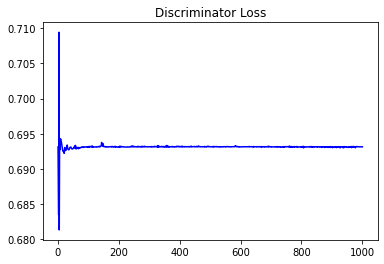

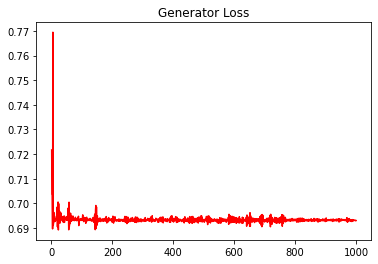

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08634397231447388


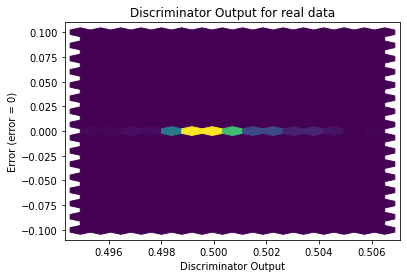

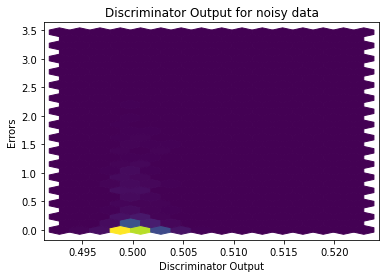

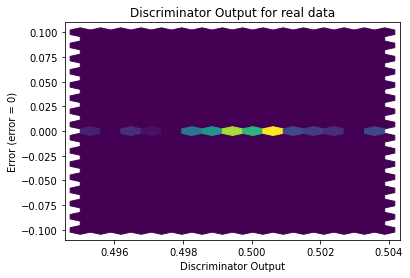

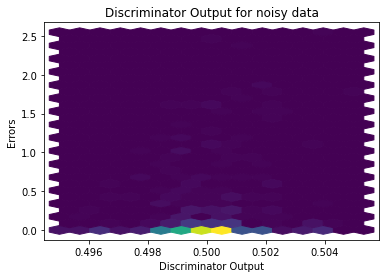

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


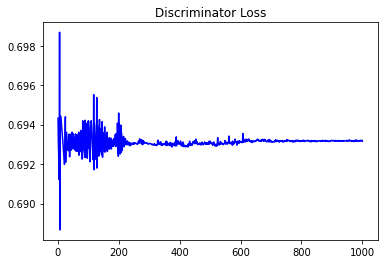

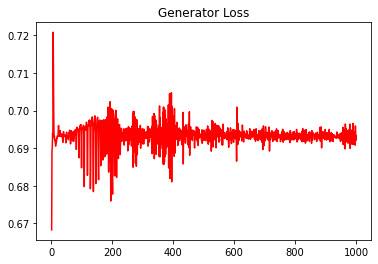

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08343779619051654


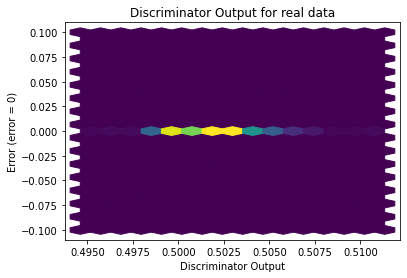

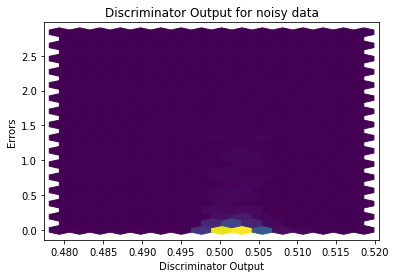

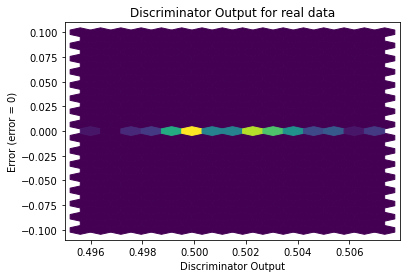

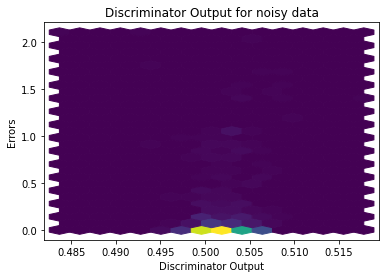

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0903]], requires_grad=True)
